In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Data Loading
data = np.genfromtxt('sgd_data.txt',delimiter = ',')
x = np.zeros((40,1), dtype = np.float)
y = np.zeros((40,1), dtype = np.float)
for i in range(data.shape[0]):
    x[i] = data[i][0]
for i in range(data.shape[0]):
    y[i] = data[i][1]
print("Input data shape = {}".format(x.shape))
print("Output data shape = {}".format(y.shape))

Input data shape = (40, 1)
Output data shape = (40, 1)


In [3]:
#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [15]:
#Mini Batch Momentum Based Gradient Discent
def Momentum_GD(x,y,epochs,batch_size,loss,eta,lr):
    w = np.random.randn()
    b = np.random.randn()
    prev_w = 0
    prev_b = 0
    l_list = []
    w_list = []
    b_list = []
    ep = [i for i in range(epochs+1)]
    dw,db = 0,0
    points = 0
    for i in range(epochs+1):
        dw,db = 0,0
        for j in range(x.shape[0]):
            if (loss == 'mse'):
                dw += grad_w_mse(x[j],y[j],w,b)
                db += grad_b_mse(x[j],y[j],w,b)
            elif (loss == 'cross_entropy'):
                dw += grad_w_cross(x[j],y[j],w,b)
                db += grad_b_cross(x[j],y[j],w,b)
            points +=1
            if (points % batch_size == 0):
                updated_w = lr*prev_w + eta*dw
                updated_b = lr*prev_b + eta*db
                w = w - updated_w
                b = b - updated_w
                prev_w = updated_w
                prev_b = updated_b
                dw,db = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm :Mini Batch Momentum Based Gradient Decent\nBatch SIze = {}\nLearning Rate(Gamma) = {}\nEta = {}\nLoss Function = {}'.format(batch_size,lr,eta,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 0th epoch = 0.2772263051946109

Loss after 1th epoch = 0.256341038110513

Loss after 2th epoch = 0.24062262086018368

Loss after 3th epoch = 0.22826599530407998

Loss after 4th epoch = 0.21824192207261103

Loss after 5th epoch = 0.20991413207421886

Loss after 6th epoch = 0.20286511396566137

Loss after 7th epoch = 0.19680800061200895

Loss after 8th epoch = 0.19153832529748788

Loss after 9th epoch = 0.1869059183204349

Loss after 10th epoch = 0.1827976974896484

Loss after 11th epoch = 0.1791266864298373

Loss after 12th epoch = 0.1758247601751723

Loss after 13th epoch = 0.17283770941673193

Loss after 14th epoch = 0.17012179562654914

Loss after 15th epoch = 0.1676412926597721

Loss after 16th epoch = 0.16536669765329787

Loss after 17th epoch = 0.16327340618120517

Loss after 18th epoch = 0.16134071584129608

Loss after 19th epoch = 0.15955106631510163

Loss after 20th epoch = 0.15788945241453567

Loss after 21th epoch = 0.1563429655043321

Loss after 22th epoch = 0.154

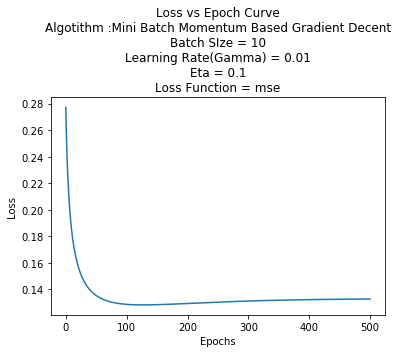

In [16]:
W,B = Momentum_GD(x,y,500,10,'mse',0.1,0.01)

In [17]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[0.81650335828288978, 0.88162342916456071, 0.93954330772040884, 0.99207011088142671, 1.0403742681445312, 1.0852640329095888, 1.1273242587041299, 1.1669935487510255, 1.204610279946511, 1.2404415996473048, 1.2747025095913092, 1.3075688828576761, 1.3391866117339761, 1.3696782015276332, 1.3991476281163484, 1.4276839848636025, 1.4553642665203572, 1.4822555258232077, 1.5084165661776952, 1.5338992859264029, 1.5587497572950013, 1.5830091007486591, 1.6067141997883174, 1.629898290011436, 1.6525914481492614, 1.6748210008402338, 1.6966118684778138, 1.7179868561496843, 1.7389669011640809, 1.7595712847265721, 1.7798178138360765, 1.799722978303306, 1.8193020868786394, 1.8385693857509993, 1.8575381621009708, 1.8762208349273555, 1.8946290349917616, 1.9127736754217219, 1.9306650142646071, 1.9483127100809794, 1.9657258714981709, 1.9829131015058901, 1.9998825371600626, 2.0166418852645918, 2.0331984545198103, 2.0495591845583077, 2.0657306722313282, 2.0817191954602161, 2.0975307349259791, 2.1

Loss after 0th epoch = 0.29457607555755655

Loss after 1th epoch = 0.2907111660340954

Loss after 2th epoch = 0.28724651349724595

Loss after 3th epoch = 0.28412245842907957

Loss after 4th epoch = 0.2812910151537175

Loss after 5th epoch = 0.27871308598353683

Loss after 6th epoch = 0.2763564486225179

Loss after 7th epoch = 0.2741942748937696

Loss after 8th epoch = 0.27220402232495716

Loss after 9th epoch = 0.2703665923487109

Loss after 10th epoch = 0.26866568238919164

Loss after 11th epoch = 0.26708728110719243

Loss after 12th epoch = 0.26561927081771997

Loss after 13th epoch = 0.2642511111558964

Loss after 14th epoch = 0.2629735850515124

Loss after 15th epoch = 0.26177859299594763

Loss after 16th epoch = 0.2606589851053218

Loss after 17th epoch = 0.2596084230332485

Loss after 18th epoch = 0.25862126565573945

Loss after 19th epoch = 0.25769247383629224

Loss after 20th epoch = 0.2568175306170347

Loss after 21th epoch = 0.255992373966695

Loss after 22th epoch = 0.255213

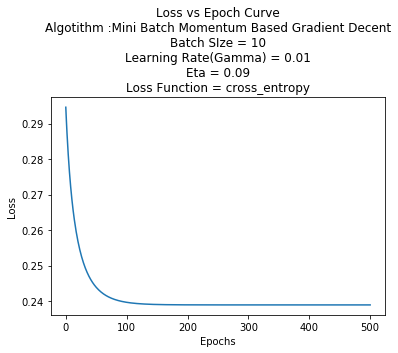

In [19]:
W,B = Momentum_GD(x,y,500,10,'cross_entropy',0.09,0.01)

In [20]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[0.73693268341842855, 0.7470959068266787, 0.75649675368752145, 0.76522126075843033, 0.77334168494829492, 0.78091934957829812, 0.78800678309747285, 0.79464935294212913, 0.80088653221090722, 0.80675289469453337, 0.81227890584447437, 0.81749155832058773, 0.82241488767350979, 0.82707039452332276, 0.83147739303339829, 0.83565330072644384, 0.83961388120353309, 0.84337344873809306, 0.84694504177275698, 0.85034057087195791, 0.85357094555310509, 0.85664618354564837, 0.8595755053464369, 0.86236741640477499, 0.86502977884718957, 0.86756987431446053, 0.8699944592127633, 0.87230981346228953, 0.87452178364932409, 0.8766358213429376, 0.87865701721863476, 0.88059013153329901, 0.88243962141454912, 0.8842096653600654, 0.88590418528591686, 0.88752686641552159, 0.88908117526090669, 0.89057037591414656, 0.89199754483817195, 0.8933655843217182, 0.89467723474231042, 0.8959350857632874, 0.89714158657547716, 0.89829905528089349, 0.8994096875043337, 0.90047556430882314, 0.9014986594822082, 0.9024

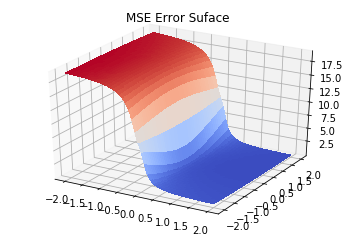

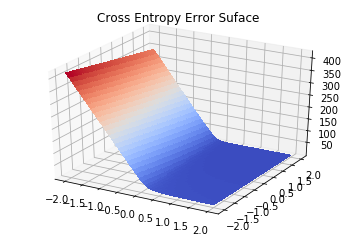

In [27]:
#Error Surface MSE
w = np.linspace(-2,2,num = 100,dtype = np.float)
b = np.linspace(-2,2,num = 100,dtype = np.float)
w,b = np.meshgrid(w,b)
mse_list = []
for i in range(w.shape[0]):
    Loss = mse(x,y,w[i],b[i])
    mse_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, mse_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('MSE Error Suface')
plt.show()
#Error Surface Cross Entropy
cross_list = []
for i in range(w.shape[0]):
    Loss = cross_entropy(x,y,w[i],b[i])
    cross_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, cross_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('Cross Entropy Error Suface')
plt.show()